In [1]:
import requests
import pandas as pd
import time
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
combined = pd.read_csv('./data/combined.csv')

In [3]:
combined.head()

,subreddit,text
0,intermittentfasting,Hello everyone with a uterus! I started interm...
1,intermittentfasting,I have a question. I'm on 16:8 and it's going ...
2,intermittentfasting,was it successful for you? did you incorporate...
3,intermittentfasting,I started doing 16:8 for a few months and lost...
4,intermittentfasting,I hope everyone has a great Thanksgiving tomor...


In [4]:
combined.shape

(16021, 2)

### EDA
---

(0.0, 7450.0)

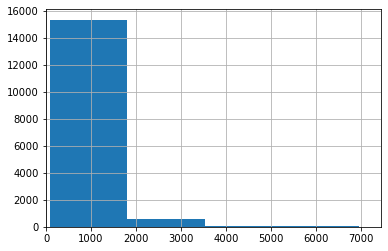

In [5]:
combined['text'].str.len().hist()
plt.xlim([0,7450])

Most of the posts ranges from between 0 and around 1800 characters.

In [6]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

(0.0, 1050.0)

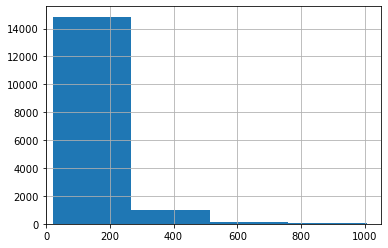

In [7]:
plot_word_number_histogram(combined['text'])
plt.xlim([0,1050])

Most of the posts ranges from between 0 and around 250 words.

In [8]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

(0.0, 15.0)

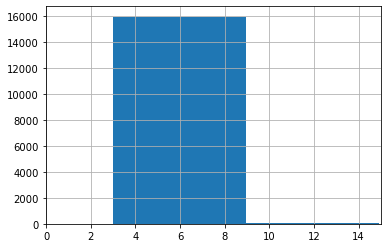

In [9]:
plot_word_length_histogram(combined['text'])
plt.xlim([0,15])

Most of the words are between 3 and 9 characters long.

In [10]:
import nltk

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ng_li\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ng_li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from nltk.corpus import stopwords

In [14]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

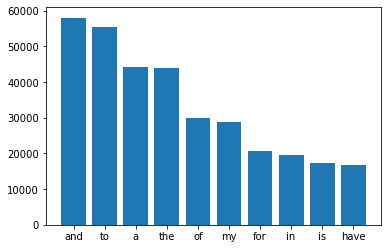

In [15]:
plot_top_stopwords_barchart(combined['text'])

The common stopword is "and".

In [16]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    
    fig, ax = plt.subplots(figsize=(9, 9))
    sns.barplot(x=y,y=x, ax=ax)

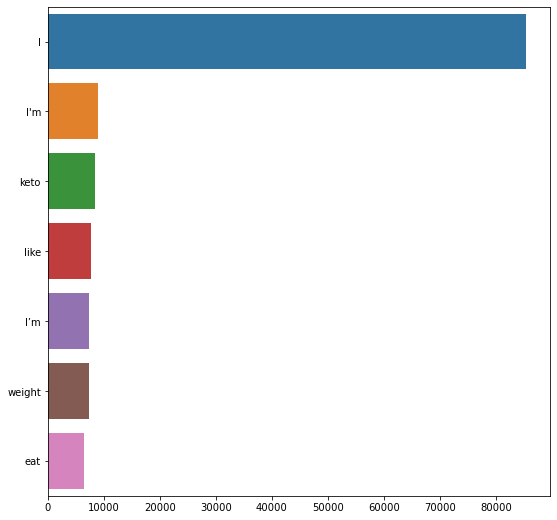

In [17]:
plot_top_non_stopwords_barchart(combined['text'])

The top three words are "I", "I'm" and "keto".

In [18]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

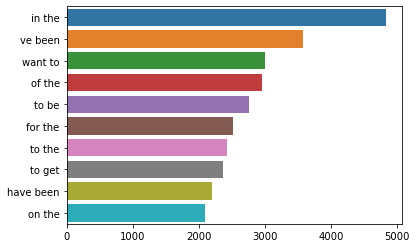

In [20]:
plot_top_ngrams_barchart(combined['text'],2)

The top three bigrams are "in the", "ve been" and "want to.
The bigrams don't provide much insights, hence we try to see the fourgrams.

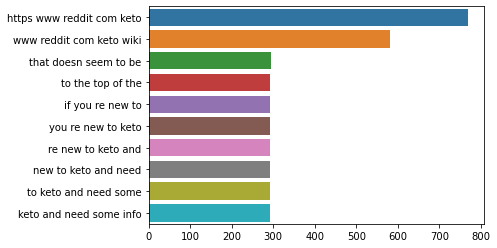

In [28]:
plot_top_ngrams_barchart(combined['text'],5)

The third fivegrams has the phrase "doesn't seem to".<br>
It seems that the post creators are probably trying something that doesn't seem to work.<br>
This is important to take note of what is probably not working for the users so that we can enhance our meal plan offerings. <br>
From the fifth fivegrams onward, it seems that many users are new to keto and need some advices and info.<br>
This shows that many people who are new to keto diet are turning to reddit for advices.<br>
We need to deep dive into what are newcomers' questions and concerns, and address them in our products. <br>
We should also target this group of people, and place targeted ads about our new keto diet meal plans.

In [22]:
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ng_li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


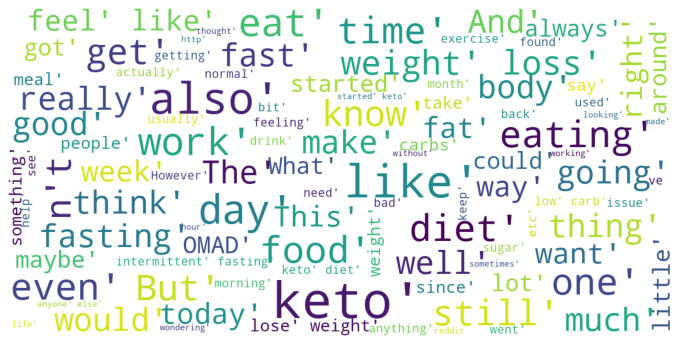

In [23]:
plot_wordcloud(combined['text'])

"Keto" stands out a lot from the word cloud!

In [24]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

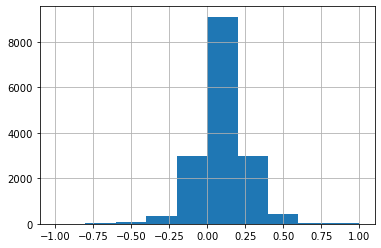

In [25]:
plot_polarity_histogram(combined['text'])

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ng_li\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


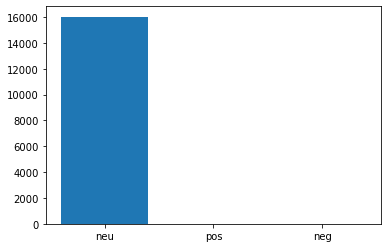

In [27]:
plot_sentiment_barchart(combined['text'], method='Vader')

Most of the posts are neutral.